# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.7.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
183702,2020-08-16,Colombia,Vichada,14,9,0,5
183703,2020-08-17,Colombia,Vichada,14,9,0,5
183704,2020-08-18,Colombia,Vichada,14,9,0,5
183705,2020-08-19,Colombia,Vichada,14,9,0,5
183706,2020-08-20,Colombia,Vichada,14,9,0,5


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
214,2020-08-16,17714,3778,340,13596
215,2020-08-17,17875,3775,341,13759
216,2020-08-18,18082,3723,344,14015
217,2020-08-19,18268,3906,347,14015
218,2020-08-20,18607,4245,347,14015


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-16,21676775,7299399,771799,13605577,0.017802,0.313828,0.053681
2020-08-17,21878851,7286238,775839,13816774,0.017730,0.315756,0.053167
2020-08-18,22128648,7303082,782604,14042962,0.017683,0.317303,0.052787
2020-08-19,22385984,7384013,788824,14213147,0.017619,0.317456,0.052581
2020-08-20,22386688,7384582,788826,14213280,0.017618,0.317449,0.052581


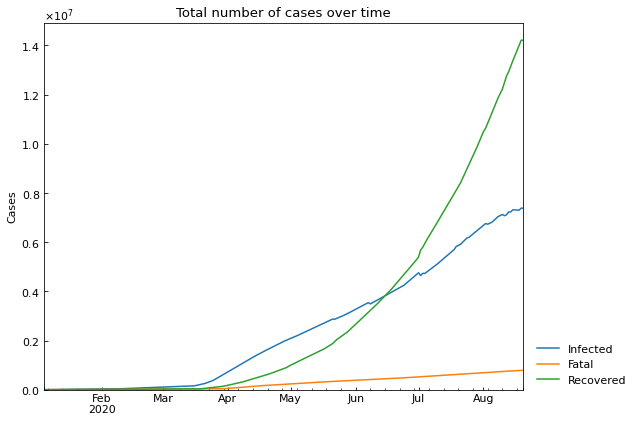

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
225,2020-08-16,56137,14959,1103,40075
226,2020-08-17,56783,14481,1118,41184
227,2020-08-18,57702,14294,1134,42274
228,2020-08-19,58772,57624,1148,41694
229,2020-08-20,59442,58293,1149,41694


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
180198,COL,Colombia,Vichada,2020-08-16,107808
180199,COL,Colombia,Vichada,2020-08-17,107808
180200,COL,Colombia,Vichada,2020-08-18,107808
180201,COL,Colombia,Vichada,2020-08-19,107808
180202,COL,Colombia,Vichada,2020-08-20,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
183702,2020-08-16,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,14,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
183702,2020-08-16,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183703,2020-08-17,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183704,2020-08-18,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183705,2020-08-19,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
183706,2020-08-20,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56
227,2020-08-18,1,1,1,0,0,1,1,3,2,2,1,30.56
228,2020-08-19,1,1,1,0,0,1,1,3,2,2,1,30.56
229,2020-08-20,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

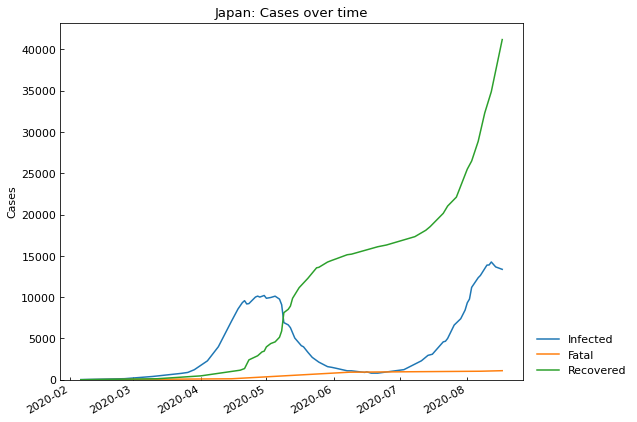

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

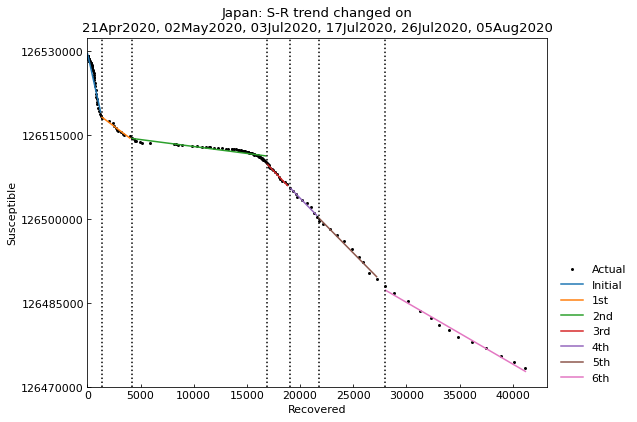

,Type,Start,End,Population
1st,Past,21Apr2020,01May2020,126529100
2nd,Past,02May2020,02Jul2020,126529100
3rd,Past,03Jul2020,16Jul2020,126529100
4th,Past,17Jul2020,25Jul2020,126529100
5th,Past,26Jul2020,04Aug2020,126529100
6th,Past,05Aug2020,17Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (05Aug2020 - 17Aug2020): finished 1458 trials in 1 min  0 sec

	1st phase (21Apr2020 - 01May2020): finished 1295 trials in 1 min  0 sec

	3rd phase (03Jul2020 - 16Jul2020): finished 1298 trials in 1 min  0 sec

	4th phase (17Jul2020 - 25Jul2020): finished 1306 trials in 1 min  0 sec

	2nd phase (02May2020 - 02Jul2020): finished 1186 trials in 1 min  0 sec

	5th phase (26Jul2020 - 04Aug2020): finished 1881 trials in 1 min  0 sec

Completed optimization. Total: 3 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],alpha1 [-],1/beta [day],1/alpha2 [day],RMSLE,Trials,Runtime
1st,Past,21Apr2020,01May2020,126529100,SIR-F,1.22,0.075589,0.000002,0.004518,0.003418,180,36,0.076,27,66168,0.125431,1295,1 min 0 sec
2nd,Past,02May2020,02Jul2020,126529100,SIR-F,0.34,0.001014,0.000383,0.003808,0.010719,180,11,0.001,32,325,0.755080,1186,1 min 0 sec
3rd,Past,03Jul2020,16Jul2020,126529100,SIR-F,2.15,0.000019,0.000041,0.018459,0.008536,180,14,0.000,6,3064,0.037191,1298,1 min 0 sec
4th,Past,17Jul2020,25Jul2020,126529100,SIR-F,1.93,0.000975,0.000004,0.017172,0.008871,180,14,0.001,7,34149,0.028353,1306,1 min 0 sec
5th,Past,26Jul2020,04Aug2020,126529100,SIR-F,1.65,0.000658,0.000024,0.017820,0.010796,180,11,0.001,7,5265,0.033411,1881,1 min 0 sec
6th,Past,05Aug2020,17Aug2020,126529100,SIR-F,1.20,0.001901,0.000029,0.011699,0.009664,180,12,0.002,10,4277,0.036263,1458,1 min 0 sec


### Accuracy of estimation

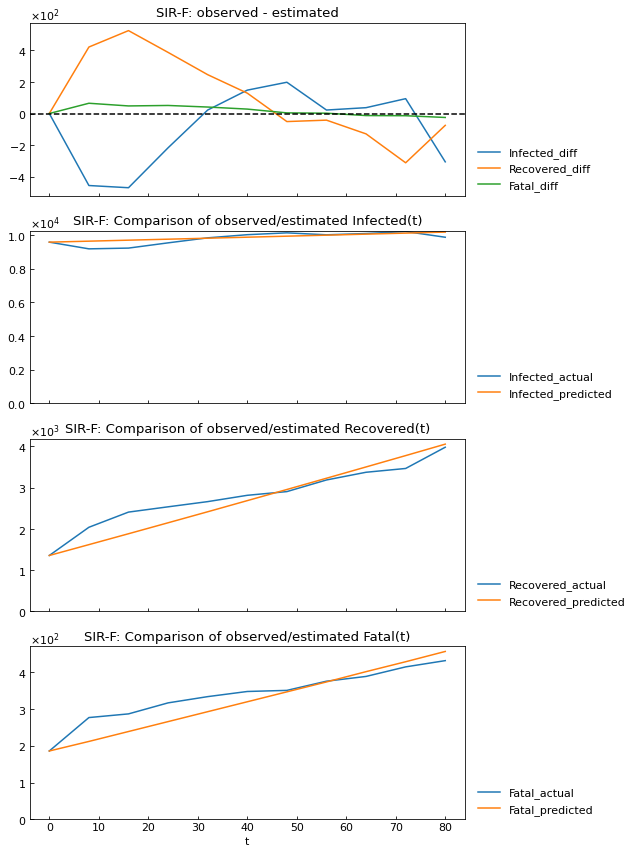

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.93

### Show parameter history

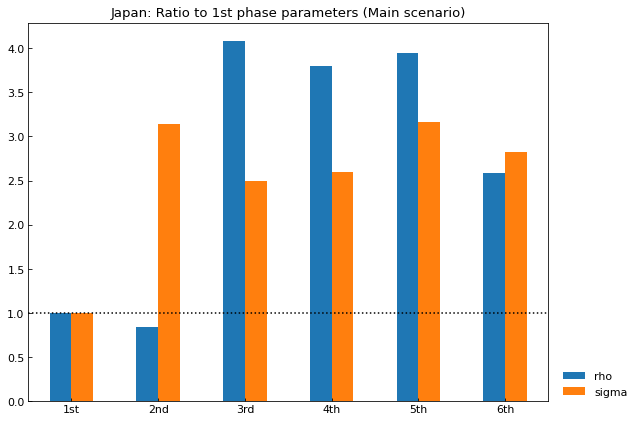

,1st,2nd,3rd,4th,5th,6th
rho,1.0,0.842888,4.085526,3.800707,3.944104,2.589413
sigma,1.0,3.135586,2.497099,2.594992,3.158209,2.827176


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

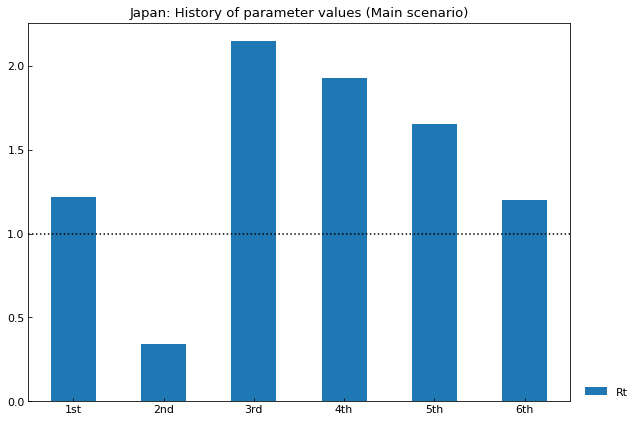

,1st,2nd,3rd,4th,5th,6th
Rt,1.22,0.34,2.15,1.93,1.65,1.2


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

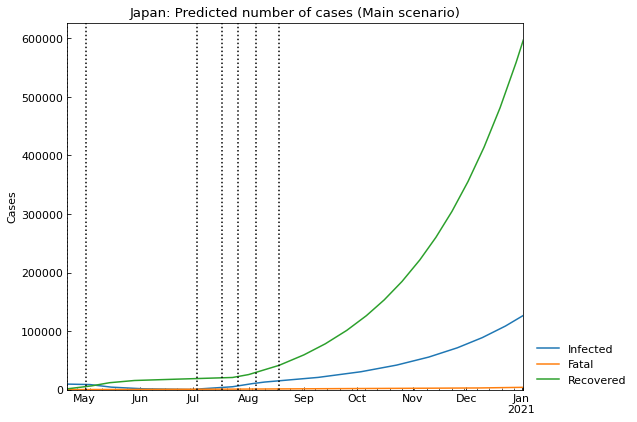

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,682260,3847,119248,559165
253,2020-12-30,693446,3896,121094,568456
254,2020-12-31,704804,3946,122967,577891
255,2021-01-01,716336,3997,124868,587471
256,2021-01-02,728047,4049,126798,597200


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.00966439960634817

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.01932879921269634

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  21Apr2020  01May2020   126529100  SIR-F  1.22   
         2nd      Past  02May2020  02Jul2020   126529100  SIR-F  0.34   
         3rd      Past  03Jul2020  16Jul2020   126529100  SIR-F  2.15   
         4th      Past  17Jul2020  25Jul2020   126529100  SIR-F  1.93   
         5th      Past  26Jul2020  04Aug2020   126529100  SIR-F  1.65   
         6th      Past  05Aug2020  17Aug2020   126529100  SIR-F  1.20   
         7th    Future  18Aug2020  01Jan2021   126529100  SIR-F  1.20   
Medicine 1st      Past  21Apr2020  01May2020   126529100  SIR-F  1.22   
         2nd      Past  02May2020  02Jul2020   126529100  SIR-F  0.34   
         3rd      Past  03Jul2020  16Jul2020   126529100  SIR-F  2.15   
         4th      Past  17Jul2020  25Jul2020   126529100  SIR-F  1.93   
         5th      Past  26Jul2020  04Aug2020   126529100  SIR-F  1.65   
         6th      Past  05Aug2020  17Aug2020   126529100  SIR-F  1.20   
         7th    Future  18Aug2020  17Sep2020   126529100  SIR-F  1.20   
         8th    Future  18Sep2020  01Jan2021   126529100  SIR-F  0.60   

                   theta     kappa       rho     sigma  tau  1/gamma [day]  \
Scenario Phase                                                               
Main     1st    0.075589  0.000002  0.004518  0.003418  180             36   
         2nd    0.001014  0.000383  0.003808  0.010719  180             11   
         3rd    0.000019  0.000041  0.018459  0.008536  180             14   
         4th    0.000975  0.000004  0.017172  0.008871  180             14   
         5th    0.000658  0.000024  0.017820  0.010796  180             11   
         6th    0.001901  0.000029  0.011699  0.009664  180             12   
         7th    0.001901  0.000029  0.011699  0.009664  180             12   
Medicine 1st    0.075589  0.000002  0.004518  0.003418  180             36   
         2nd    0.001014  0.000383  0.003808  0.010719  180             11   
         3rd    0.000019  0.000041  0.018459  0.008536  180             14   
         4th    0.000975  0.000004  0.017172  0.008871  180             14   
         5th    0.000658  0.000024  0.017820  0.010796  180             11   
         6th    0.001901  0.000029  0.011699  0.009664  180             12   
         7th    0.001901  0.000029  0.011699  0.009664  180             12   
         8th    0.001901  0.000029  0.011699  0.019329  180              6   

                alpha1 [-]  1/beta [day]  1/alpha2 [day]      RMSLE Trials  \
Scenario Phase                                                               
Main     1st         0.076            27           66168   0.125431   1295   
         2nd         0.001            32             325    0.75508   1186   
         3rd         0.000             6            3064  0.0371909   1298   
         4th         0.001             7           34149   0.028353   1306   
         5th         0.001             7            5265  0.0334112   1881   
         6th         0.002            10            4277  0.0362631   1458   
         7th         0.002            10            4277          -      -   
Medicine 1st         0.076            27           66168   0.125431   1295   
         2nd         0.001            32             325    0.75508   1186   
         3rd         0.000             6            3064  0.0371909   1298   
         4th         0.001             7           34149   0.028353   1306   
         5th         0.001             7            5265  0.0334112   1881   
         6th         0.002            10            4277  0.0362631   1458   
         7th         0.002            10            4277          -      -   
         8th         0.002            10            4277          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec 

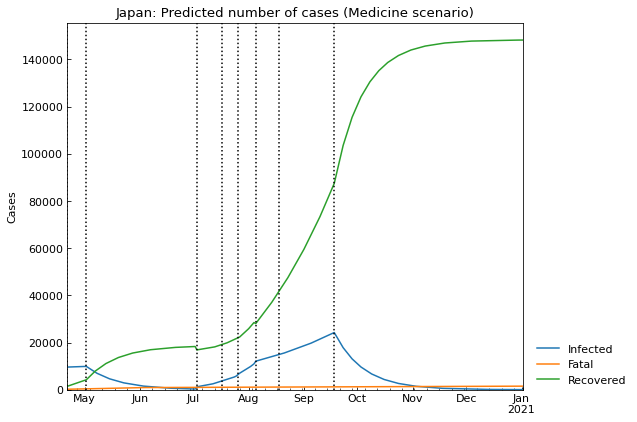

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,149693,1500,46,148147
253,2020-12-30,149697,1500,43,148154
254,2020-12-31,149701,1500,40,148161
255,2021-01-01,149705,1500,38,148167
256,2021-01-02,149708,1500,36,148172


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,126798,02Jan2021,126798,4049,-
Medicine,24221,18Sep2020,36,1500,0.6
